In [24]:
import tensorflow as tf
from IPython.display import Image

wandb 라이브러리를 임포트하고 나중에 콜백을 주기 위해 WandbCallback도 로드한다.

In [25]:
import wandb 
from wandb.keras import WandbCallback

In [26]:
default_config = {
    'learning_rate': 0.001,
    'dropout_rate': 0.2,
    'hidden1': 128,
    'activation1': 'relu'
}
wandb.init(project='mnist-tf2', config=default_config)
config = wandb.config

epoch,4
loss,0.07566
accuracy,0.97592
val_loss,0.07169
val_accuracy,0.9783
_runtime,70
_timestamp,1617809398
_step,4
best_val_loss,0.07169
best_epoch,4


epoch,▁▃▅▆█
loss,█▃▂▁▁
accuracy,▁▆▇██
val_loss,█▄▃▂▁
val_accuracy,▁▅▆▇█
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: wandb version 0.10.25 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


이미 로그인을 해놨다면 별도의 인증 키 입력 없이 바로 실행이 가능하다.

만약 처음 실행이라면, 출력문의 링크에서 키를 복사한 후 창에 붙여넣기 하면 된다.

- `wandb.init()`내의 `project`는 wandb.ai에서 사용되는 워크스페이스 이름을 나타낸다.
- `config=default_config`는 위에서 선언한 하이퍼 파라미터를 사용하겠다는 의미이다.
밑에서 모델을 만들 때 숫자를 입력하지 않고 변수들을 가져다 쓸 수 있다.

In [27]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0,  x_test / 255.0

예제에서는 MNIST 데이터셋을 사용한다.

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(config.hidden1, activation=config.activation1),
    tf.keras.layers.Dropout(config.dropout_rate),
    tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adam(learning_rate=config.learning_rate)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

첫 번째 Dense 레이어를 살펴보면 원래 `Dense(128, activation='relu')` 와 같이 쓰였을 것이다. 그러나 위에서 선언한 `config`를 사용하면 하이퍼 파라미터를 변경할 때 관리에 용이하다.

In [29]:
model.fit(x_train, y_train, 
          validation_data = (x_test, y_test), # 중간중간에 성능 체크
          epochs=5, callbacks=[WandbCallback()])

model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2973 - accuracy: 0.9129 - val_loss: 0.1496 - val_accuracy: 0.9559
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1430 - accuracy: 0.9578 - val_loss: 0.0955 - val_accuracy: 0.9693
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1062 - accuracy: 0.9678 - val_loss: 0.0842 - val_accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0869 - accuracy: 0.9736 - val_loss: 0.0824 - val_accuracy: 0.9735
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0742 - accuracy: 0.9767 - val_loss: 0.0757 - val_accuracy: 0.9767
313/313 - 0s - loss: 0.0757 - accuracy: 0.9767


[0.07571198791265488, 0.9767000079154968]

이렇게 학습이 진행되고 나면 wandb.ai의 워크스페이스에 모델 점수가 기록되어 있다.

아래의 그림은 몇 번 모델 학습을 반복한 모습을 나타내는 리포트다.

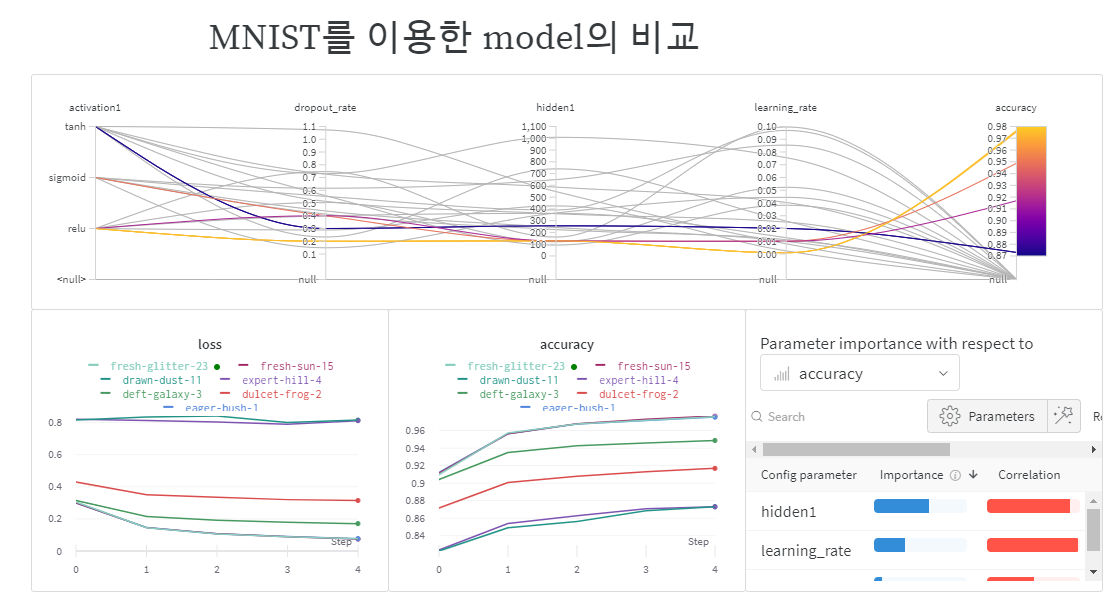

In [30]:
Image("1.png")

캡쳐화면이지만 실제로 인터랙티브하게 원하는 모델의 점수를 살펴볼 수도 있고, 어떤 하이퍼 파라미터를 썼는지 알아볼 수 있다. 마지막 그림은 각 하이퍼 파라미터가 중요도를 얼마나 가지는지 나타낸다.

In [31]:
!wandb agent kade/mnist-tf2/rq02mc7g


Epoch 1/5




wandb: Starting wandb agent \U0001f575\ufe0f
2021-04-08 01:09:35,381 - wandb.wandb_agent - INFO - Running runs: []
2021-04-08 01:09:37,443 - wandb.wandb_agent - INFO - Agent received command: run
2021-04-08 01:09:37,443 - wandb.wandb_agent - INFO - Agent starting run with config:


Epoch 1/5




	activation1: sigmoid
	dropout_rate: 0.667476150409327
	epochs: 1584

Epoch 1/5


Epoch 1/5


Epoch 1/5




	hidden1: 759
	learning_rate: 0.07236291665341921
2021-04-08 01:09:37,445 - wandb.wandb_agent - INFO - About to run command: python train.py --activation1=sigmoid --dropout_rate=0.667476150409327 --epochs=1584 --hidden1=759 --learning_rate=0.07236291665341921
2021-04-08 01:09:37.712743: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
wandb: Currently logged in as: kade (use `wandb login --relogin` to force relogin)
wandb: WARNING Ignored wandb.init() arg project when running a sweep
2021-04-08 01:09:42,451 - wandb.wandb_agent - INFO - Running runs: ['j9fym73s']
2021-04-08 01:09:42.746233: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
wandb: Tracking run with wandb version 0.10.25
wandb: Syncing run grateful-sweep-19
wandb:  View project at https://wandb.ai/kade/mnist-tf2
wandb:  View sweep at https://wandb.ai/kade/mnist-tf2/sweeps/rq02mc7g
wandb: 

2021-04-08 01:11:04.631750: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1858] Adding visible gpu devices: 0
2021-04-08 01:11:05.044996: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1257] Device interconnect StreamExecutor with strength 1 edge matrix:
2021-04-08 01:11:05.045016: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1263]      0 
2021-04-08 01:11:05.045021: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1276] 0:   N 
2021-04-08 01:11:05.045141: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1402] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 4746 MB memory) -> physical GPU (device: 0, name: GeForce GTX 1660 SUPER, pci bus id: 0000:06:00.0, compute capability: 7.5)
2021-04-08 01:11:05.047260: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1739e148de0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2021-04-08 01:11:05.047270: I tensorflow/compiler/xla/service/service.c